In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('dataset/Mall_Customers.csv')

print(df.head())

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male -> 1, Female -> 0

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

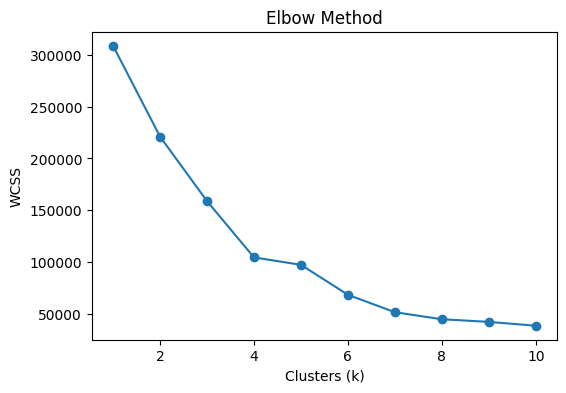

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [5]:
k_opt = 5
kmeans_model = KMeans(n_clusters=k_opt, random_state=42)

kmeans_model.fit(X)

df['Cluster'] = kmeans_model.labels_

print(df.head(10))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   
5           6       0   22                  17                      76   
6           7       0   35                  18                       6   
7           8       0   23                  18                      94   
8           9       1   64                  19                       3   
9          10       0   30                  19                      72   

   Cluster  
0        2  
1        2  
2        0  
3        2  
4        0  
5        2  
6        0  
7        2  
8        0  
9        2  


In [6]:
print("Clusters coords:")
print(kmeans_model.cluster_centers_)

Clusters coords:
[[  0.38202247  46.21348315  47.71910112  41.79775281]
 [  0.45454545  32.45454545 108.18181818  82.72727273]
 [  0.48275862  24.68965517  29.5862069   73.65517241]
 [  0.52631579  40.39473684  87.          18.63157895]
 [  0.45454545  31.78787879  76.09090909  77.75757576]]


In [7]:
print(df['Cluster'].value_counts())

Cluster
0    89
3    38
4    33
2    29
1    11
Name: count, dtype: int64


In [8]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         69.247191  0.382022  46.213483           47.719101   
1        190.000000  0.454545  32.454545          108.181818   
2         30.586207  0.482759  24.689655           29.586207   
3        162.000000  0.526316  40.394737           87.000000   
4        145.575758  0.454545  31.787879           76.090909   

         Spending Score (1-100)  
Cluster                          
0                     41.797753  
1                     82.727273  
2                     73.655172  
3                     18.631579  
4                     77.757576  


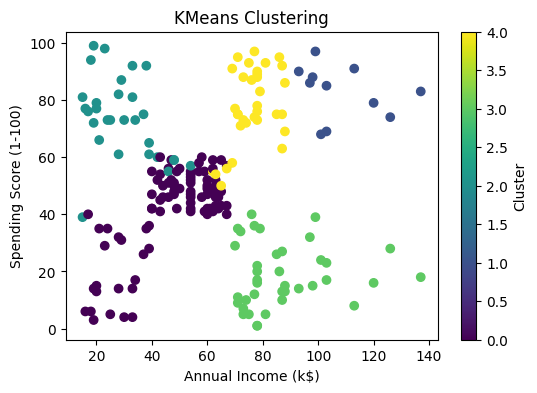

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(
    X['Annual Income (k$)'],
    X['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='viridis'
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()